# Exploratory Data Analysis (EDA)

This is a Python Notebook that contains the EDA for this MSc thesis. 

Student ID: B721581

It is broken down into the following sections:
1. Import Libraries
2. Load Data
3. Initial Data Cleaning
4. Category Distribution Analysis
5. Histograms
6. Correlations
7. Time Series Analysis

## 1. Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [33]:
# read csv file
data = pd.read_csv('data/Gym_Data.csv')

# show dataset info
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4703200 entries, 0 to 4703199
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Object            4703200 non-null  int64  
 1   Day               4703200 non-null  int64  
 2   Workout           4703200 non-null  object 
 3   Sensor_Position   4703200 non-null  object 
 4   A_x               4703200 non-null  float64
 5   A_y               4703200 non-null  float64
 6   A_z               4703200 non-null  float64
 7   G_x               4703200 non-null  float64
 8   G_y               4703200 non-null  float64
 9   G_z               4703200 non-null  float64
 10  Body_Capacitance  4703200 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 394.7+ MB


## 3. Initial Data Cleaning

In [34]:
# remove body capacitance
data.drop(axis = 1, columns = 'Body_Capacitance', inplace = True)

# convert appropriate columns to categorical
data['Object'] = data['Object'].astype('category')
data['Day'] = data['Day'].astype('category')
data['Workout'] = data['Workout'].astype('category')
data['Sensor_Position'] = data['Sensor_Position'].astype('category')

# save cleaned data as a csv file
data.to_csv('data/Clean_Gym_Data.csv')

In [35]:
# show dataset info
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4703200 entries, 0 to 4703199
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   Object           4703200 non-null  category
 1   Day              4703200 non-null  category
 2   Workout          4703200 non-null  category
 3   Sensor_Position  4703200 non-null  category
 4   A_x              4703200 non-null  float64 
 5   A_y              4703200 non-null  float64 
 6   A_z              4703200 non-null  float64 
 7   G_x              4703200 non-null  float64 
 8   G_y              4703200 non-null  float64 
 9   G_z              4703200 non-null  float64 
dtypes: category(4), float64(6)
memory usage: 233.2 MB


- row number: 4703200
- column number: 10
- data has no missing values

In [36]:
# show statistical description of dataset
data.describe()

,A_x,A_y,A_z,G_x,G_y,G_z
count,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06
mean,5.035507e-01,4.985133e-01,4.977778e-01,4.997786e-01,4.995448e-01,5.002019e-01
std,4.246152e-02,4.969804e-02,3.060151e-02,4.460951e-02,3.632589e-02,4.586413e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.965000e-01,4.931250e-01,4.945000e-01,4.931250e-01,4.945312e-01,4.929688e-01
50%,5.000000e-01,4.997500e-01,4.998750e-01,4.999625e-01,5.000000e-01,4.999625e-01
75%,5.056250e-01,5.047500e-01,5.032500e-01,5.064437e-01,5.051937e-01,5.054312e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


- accel and gyro are already normalised (minmax scaled) between 0 - 1

## 4. Category Distribution Analysis

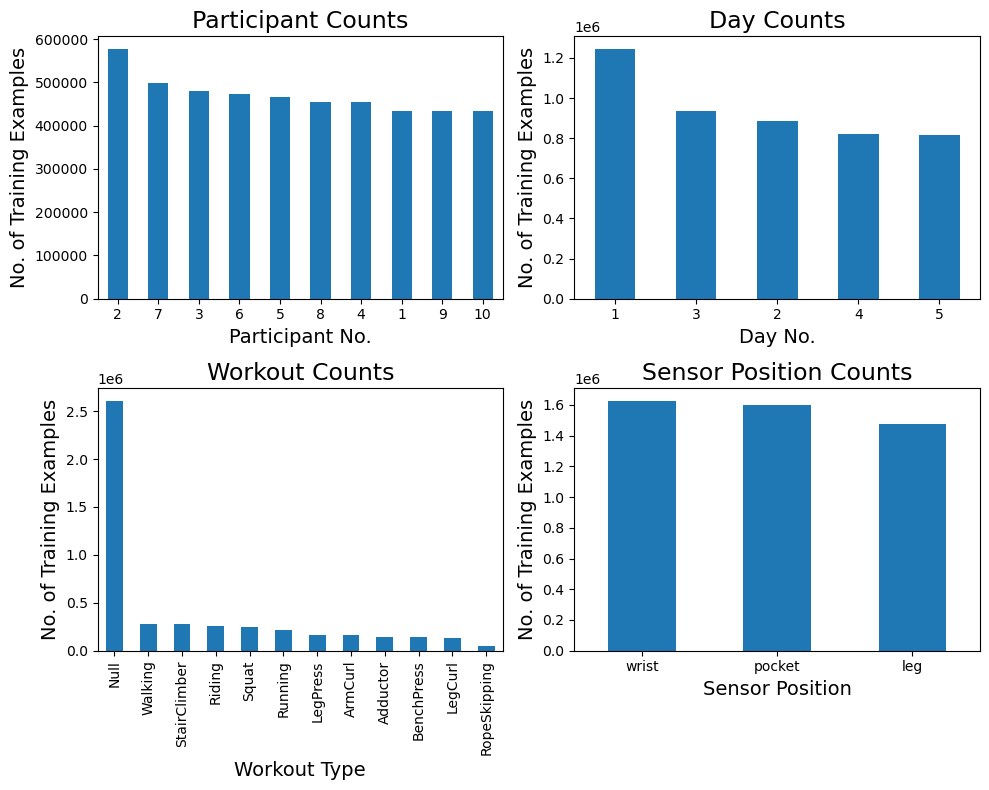

In [37]:
# create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# get counts of each categorical column
Object_counts = data['Object'].value_counts()
Day_counts = data['Day'].value_counts()
Workout_counts = data['Workout'].value_counts()
Sensor_Position_counts = data['Sensor_Position'].value_counts()

# set variables
title_size = 17
axis_size = 14
label_size = 10

# plot bar graphs of categories in categorical columns
Object_counts.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel('Participant No.', fontsize=axis_size)  
axes[0, 0].set_ylabel('No. of Training Examples', fontsize=axis_size)  
axes[0, 0].set_title('Participant Counts', fontsize=title_size)  
axes[0, 0].xaxis.set_tick_params(rotation=0) 
axes[0, 0].tick_params(axis='both', labelsize=label_size)  

Day_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel('Day No.', fontsize=axis_size)  
axes[0, 1].set_ylabel('No. of Training Examples', fontsize=axis_size)  
axes[0, 1].set_title('Day Counts', fontsize=title_size) 
axes[0, 1].xaxis.set_tick_params(rotation=0)  
axes[0, 1].tick_params(axis='both', labelsize=label_size)  

Workout_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Workout Type', fontsize=axis_size) 
axes[1, 0].set_ylabel('No. of Training Examples', fontsize=axis_size)  
axes[1, 0].set_title('Workout Counts', fontsize=title_size)  
axes[1, 0].tick_params(axis='both', labelsize=label_size)  

Sensor_Position_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Sensor Position', fontsize=axis_size)  
axes[1, 1].set_ylabel('No. of Training Examples', fontsize=axis_size)  
axes[1, 1].set_title('Sensor Position Counts', fontsize=title_size)  
axes[1, 1].xaxis.set_tick_params(rotation=0) 
axes[1, 1].tick_params(axis='both', labelsize=label_size) 

# adjust the layout and spacing
plt.tight_layout()

# save the figure
plt.savefig("category_bar_plots.png")

# show the plot
plt.show()

- the data set is imbalanced --> very large Null count

## 5. Histograms

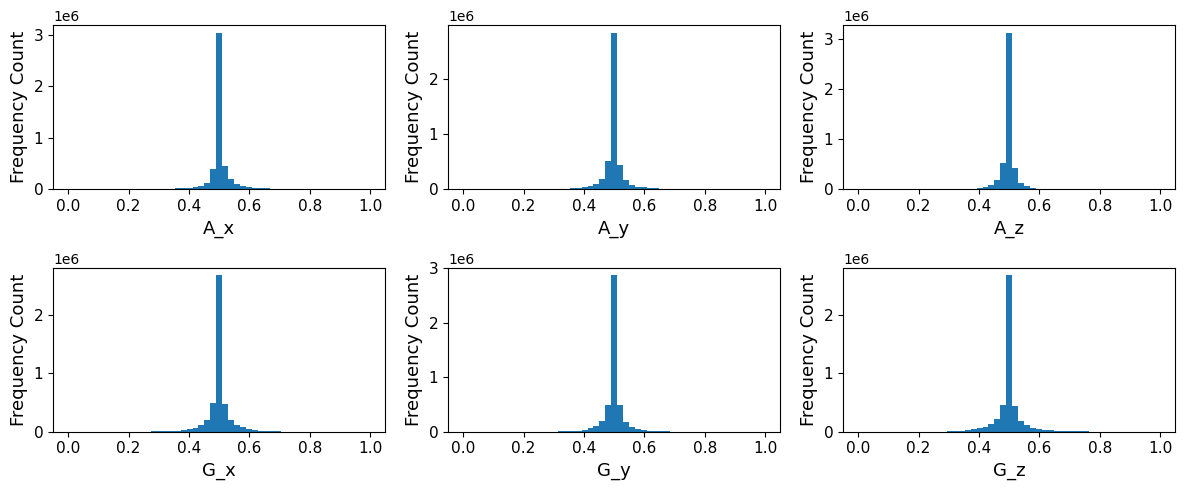

In [38]:
# get list of features
features = list(data.columns[4:])

# create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 5))

# plot histograms
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row, col].hist(data[feature], bins=51)
    axes[row, col].set_xlabel(f"{feature}", fontsize=13)
    axes[row, col].set_ylabel("Frequency Count", fontsize=13)
    axes[row, col].tick_params(axis='both', labelsize=11) 

# adjust the layout and spacing
plt.tight_layout()

# save the figure
plt.savefig("histograms.png")

# show the plot
plt.show()

## 6. Correlations

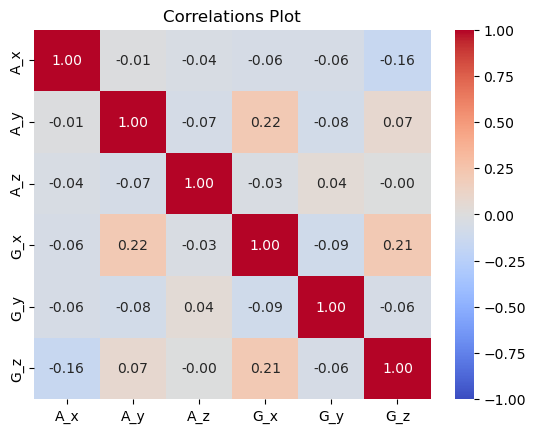

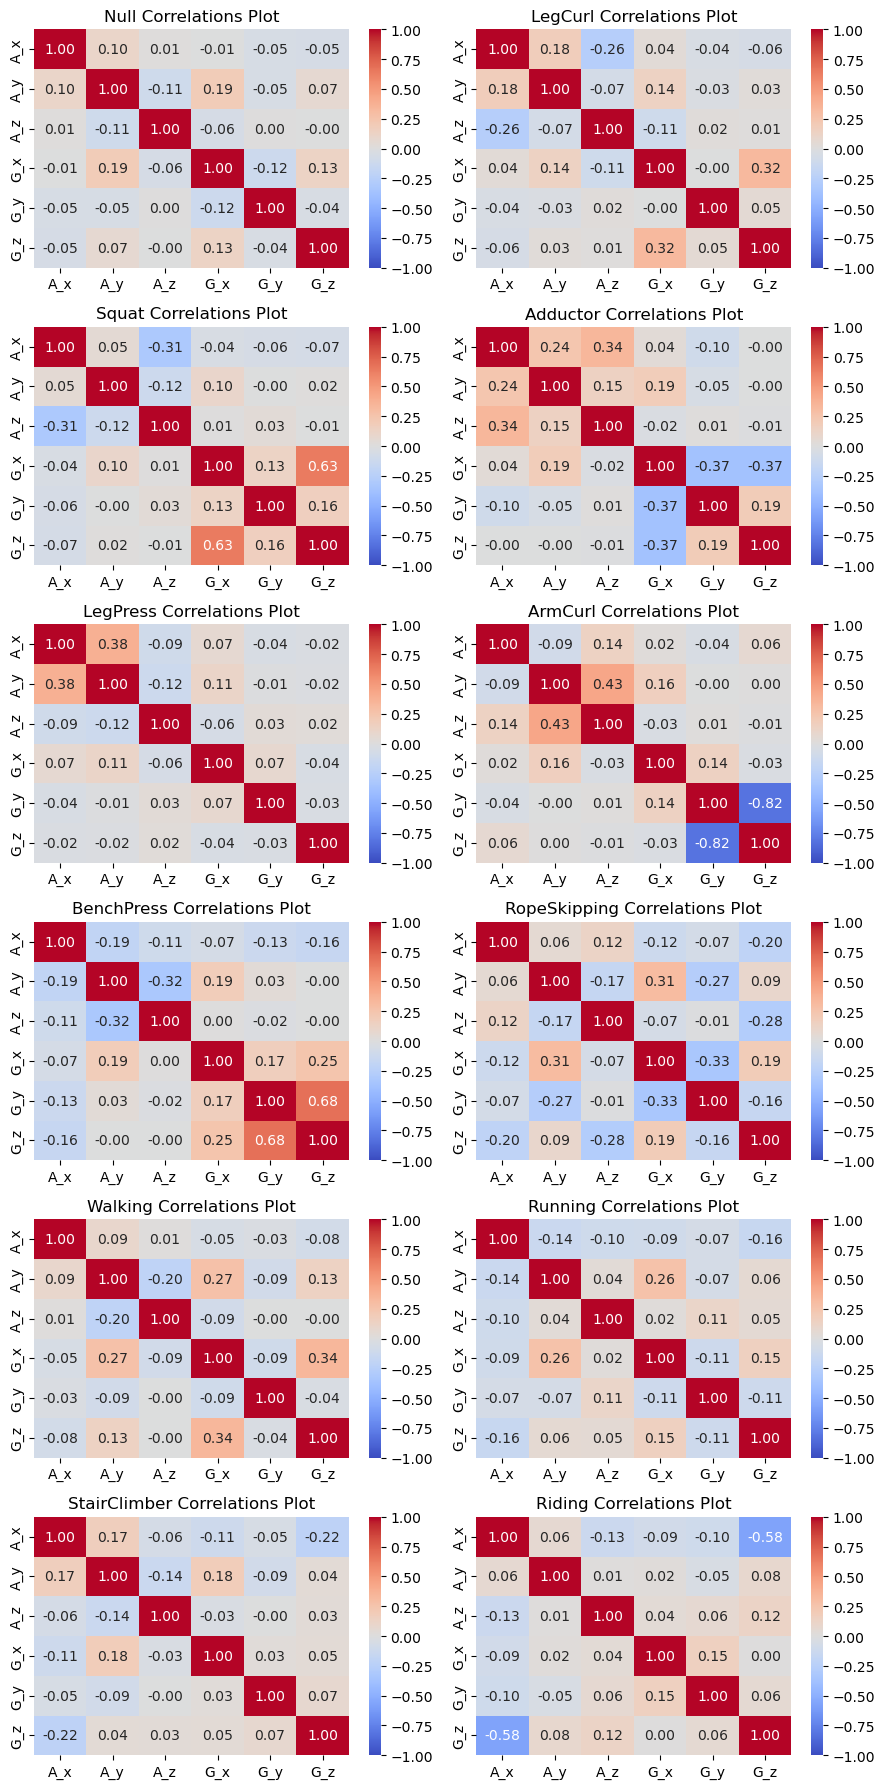

In [39]:
# create correlations plot for all data
sns.heatmap(data.corr(), 
            annot=True,
            fmt=".2f",
            vmin=-1, 
            vmax=1, 
            center=0,
            cmap="coolwarm")
plt.title(f"Correlations Plot")

# save the figure
plt.savefig("corr_plot.png")

# show the plot
plt.show()

# get list of workout classes and length of this list
workout_list = list(data['Workout'].unique())
num_workouts = len(workout_list)

# set subplots layout
num_rows = 6
num_cols = 2 
num_plots = num_rows * num_cols

# create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# create correlations plot for each workout class
for i, workout in enumerate(workout_list):
    filtered_data = data[data['Workout'] == workout]
    row = math.floor(i / num_cols)
    col = i % num_cols
    ax = axes[row, col]
    sns.heatmap(filtered_data.corr(),
                annot=True,
                fmt=".2f",
                vmin=-1,
                vmax=1,
                center=0,
                cmap="coolwarm",
                ax=ax)
    ax.set_title(f"{workout} Correlations Plot")

# Hide empty subplots
for i in range(num_workouts, num_plots):
    row = math.floor(i / num_cols)
    col = i % num_cols
    fig.delaxes(axes[row, col])

# adjust the layout and spacing  
plt.tight_layout()

# save the figure
plt.savefig("workouts_corr_plot.png")

# show the plot
plt.show()

## 7. Time Series Analysis

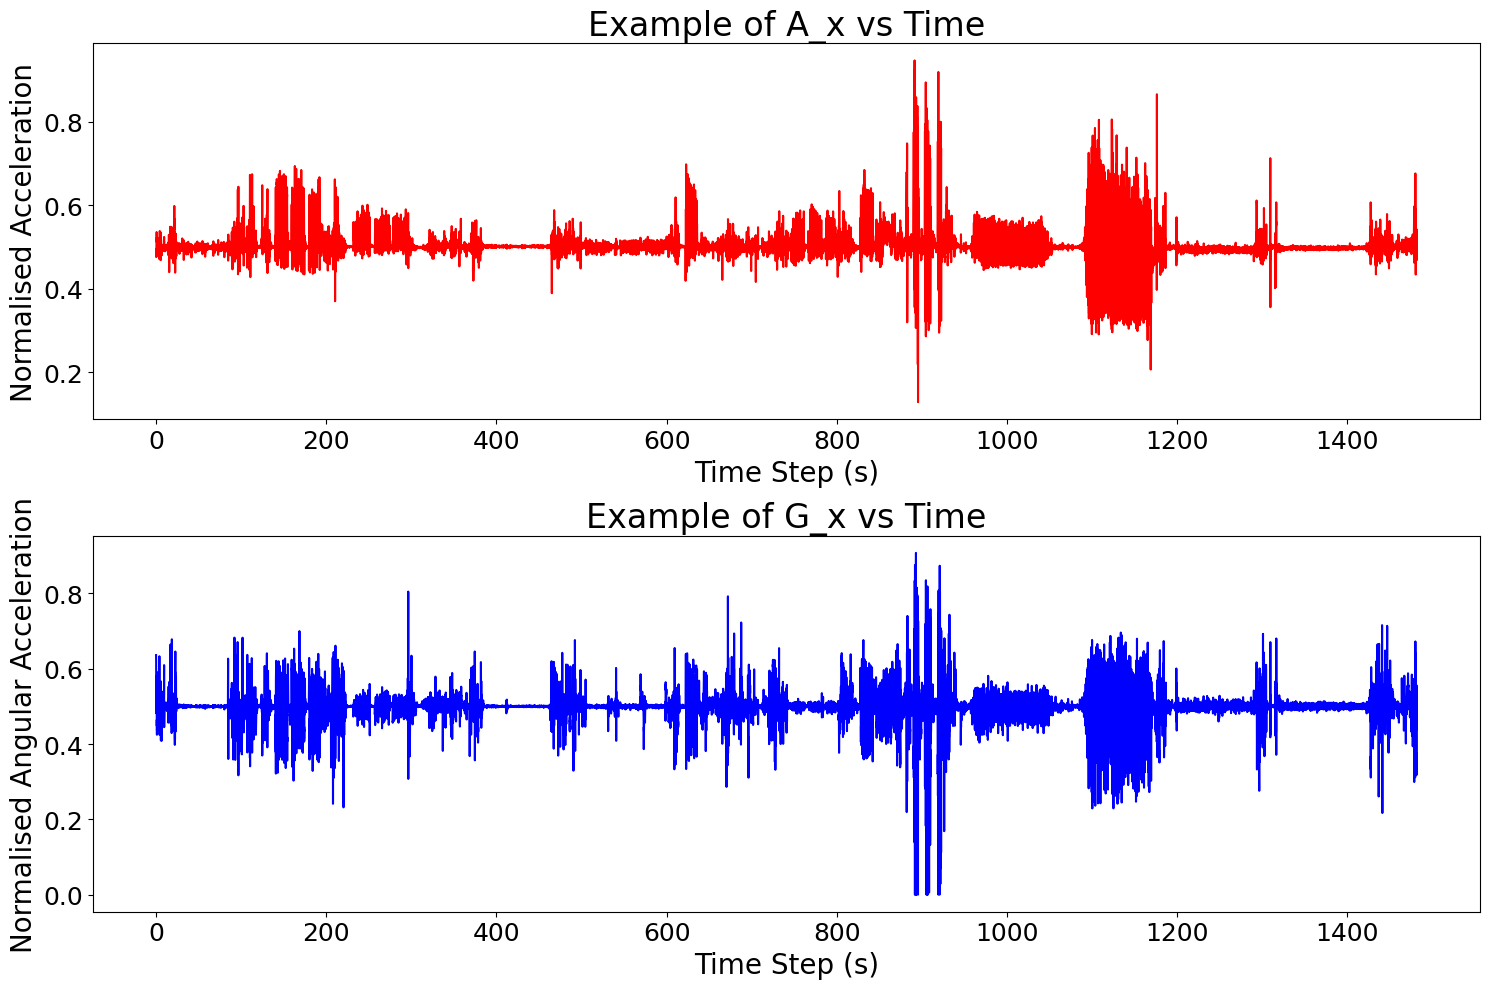

In [40]:
# set variables
participant_id = 8
day = 4
sensor_position = 'wrist'
title_size = 24
axis_size = 20
label_size = 18

# filter the data
filtered_data = data[(data['Object'] == participant_id) &
                     (data['Day'] == day) &
                     (data['Sensor_Position'] == sensor_position)]

# add column with timestep (20Hz / 0.05s)
filtered_data['timestep'] = range(0, 0 + len(filtered_data))
filtered_data['timestep'] = filtered_data['timestep'] * 0.05

# create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# create the normalised acceleration vs time plot
filtered_data.plot.line(x='timestep', y='A_x', color='r', ax=ax1, legend=False)
ax1.set_title(f'Example of A_x vs Time', fontsize=title_size)
ax1.set_xlabel('Time Step (s)', fontsize=axis_size)
ax1.set_ylabel('Normalised Acceleration', fontsize=axis_size)
ax1.tick_params(axis='both', labelsize=label_size)

# create the normalised angular acceleration vs time plot
filtered_data.plot.line(x='timestep', y='G_x', color='b', ax=ax2, legend=False)
ax2.set_title(f'Example of G_x vs Time', fontsize=title_size)
ax2.set_xlabel('Time Step (s)', fontsize=axis_size)
ax2.set_ylabel('Normalised Angular Acceleration', fontsize=axis_size)
ax2.tick_params(axis='both', labelsize=label_size)

# adjust the layout and spacing  
plt.tight_layout()

# save the figure
plt.savefig("time_series.png")

# show the plot
plt.show()

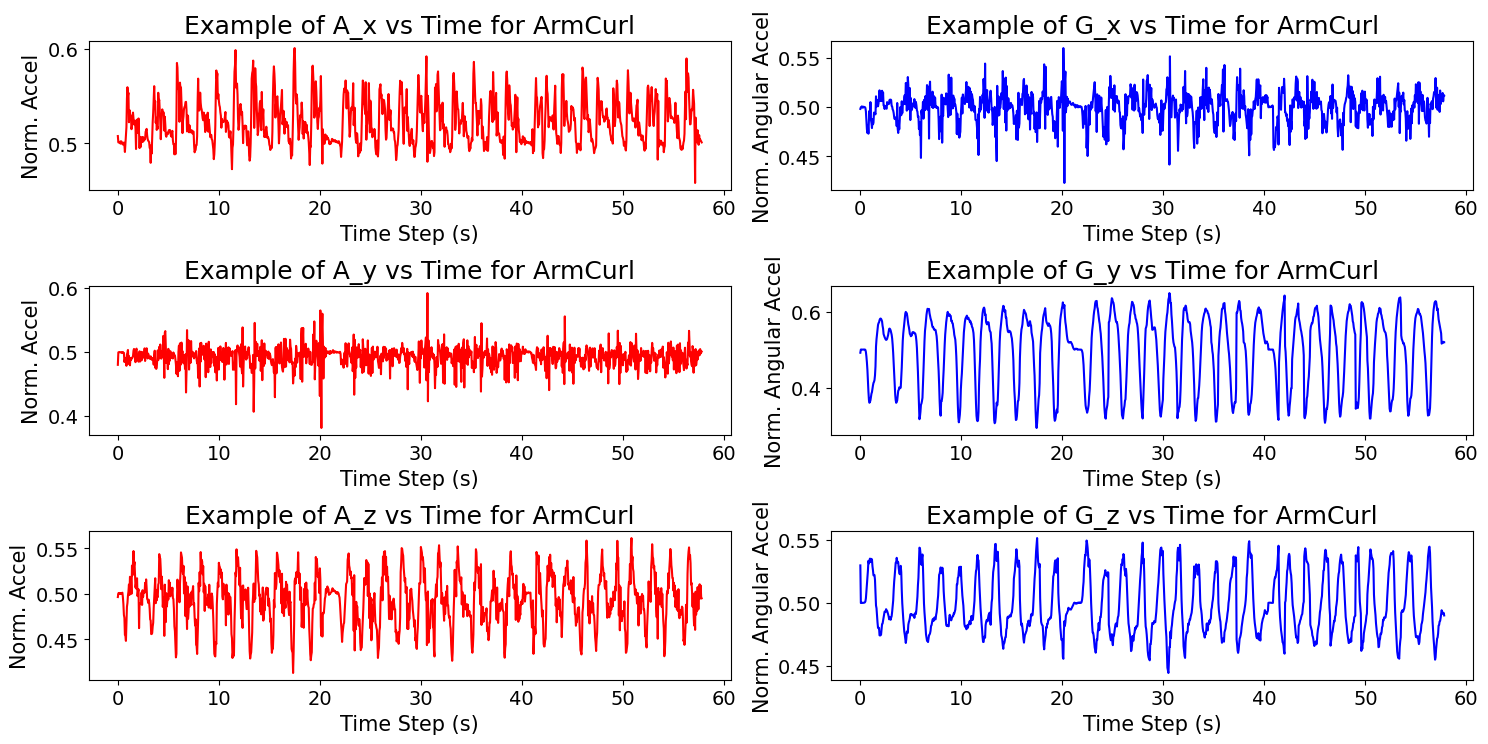

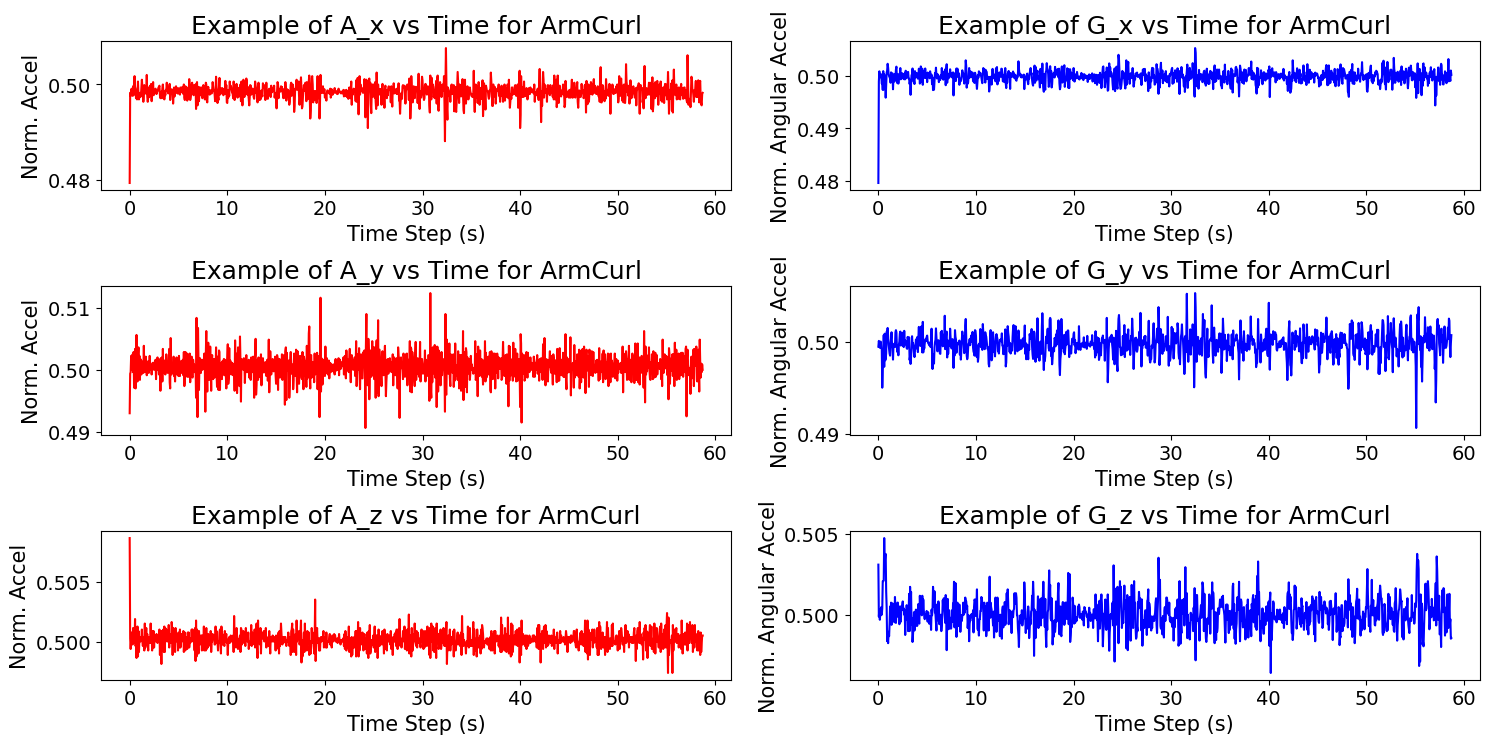

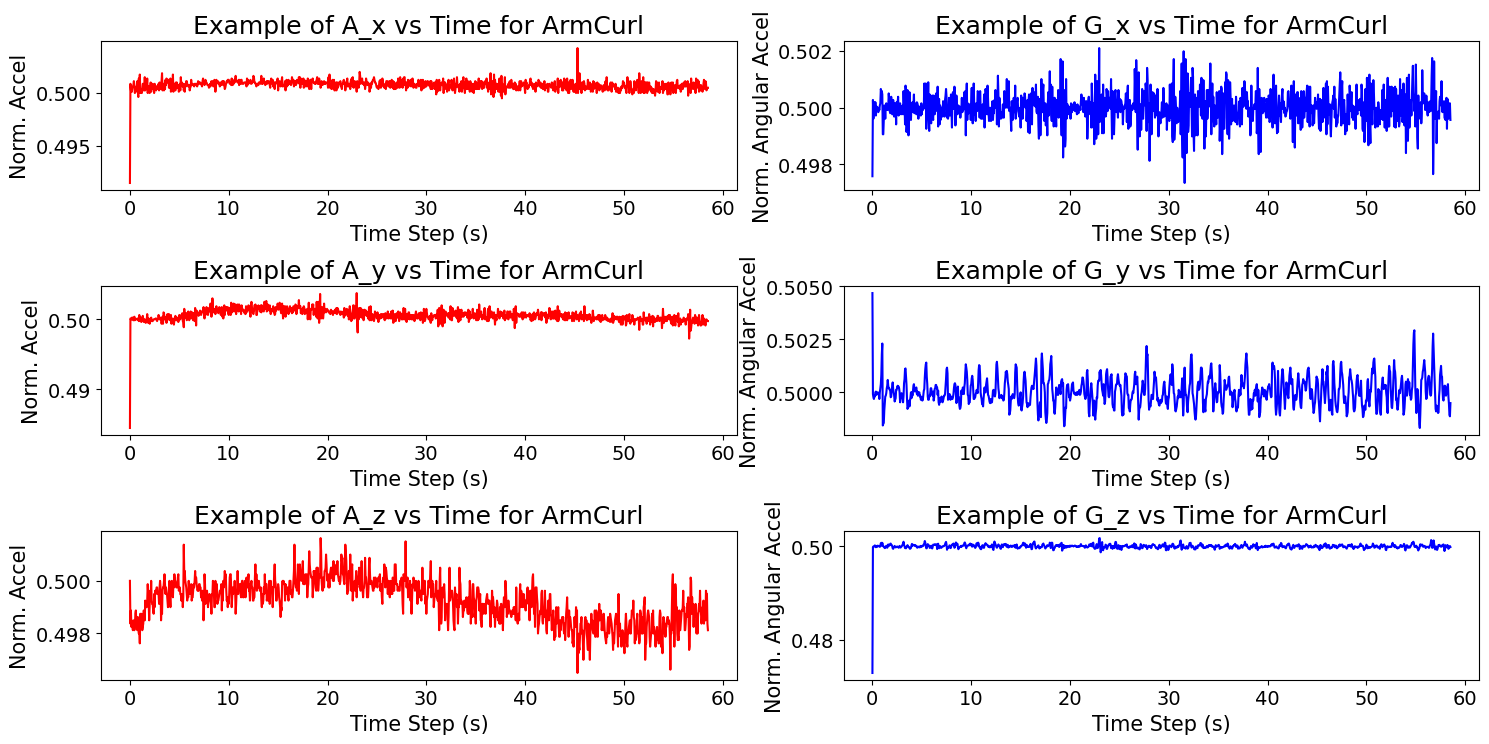

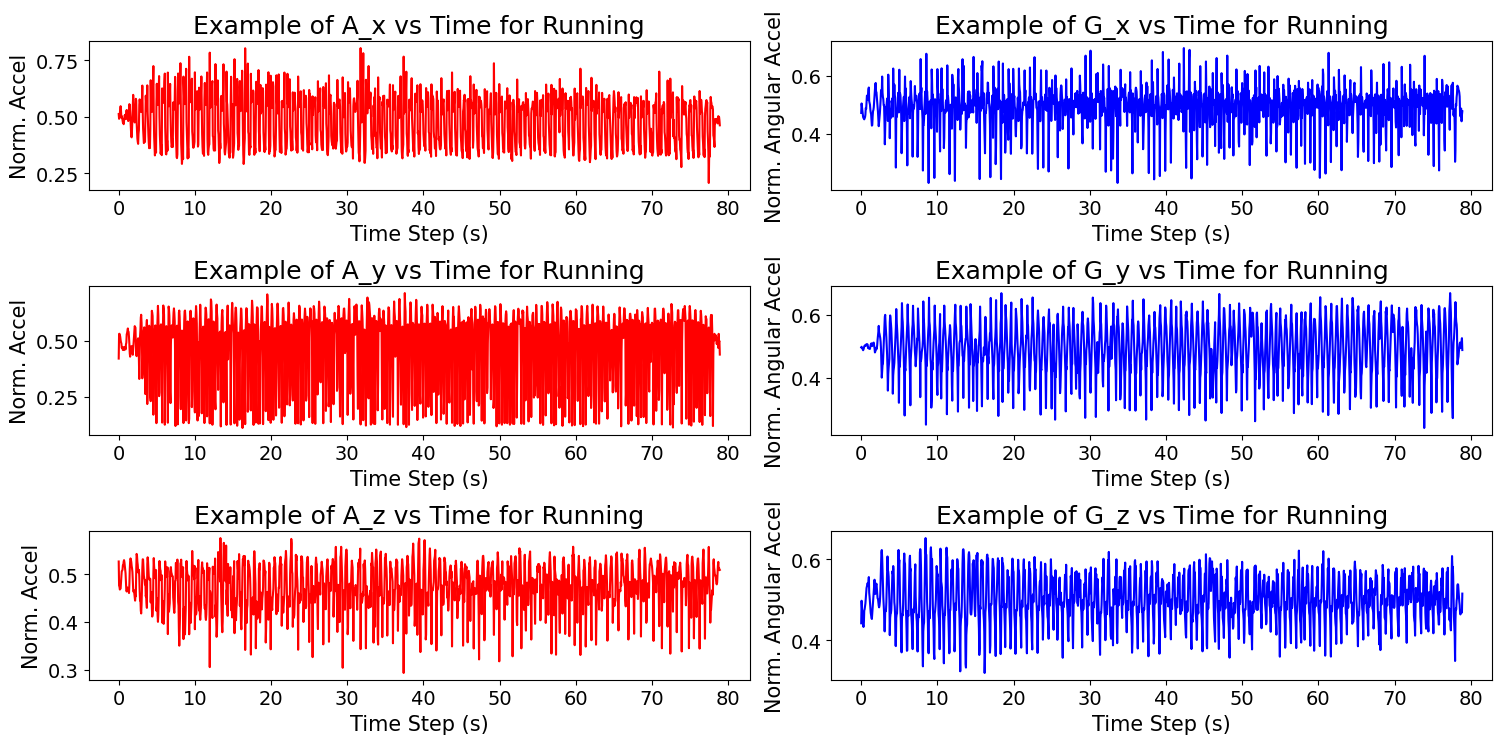

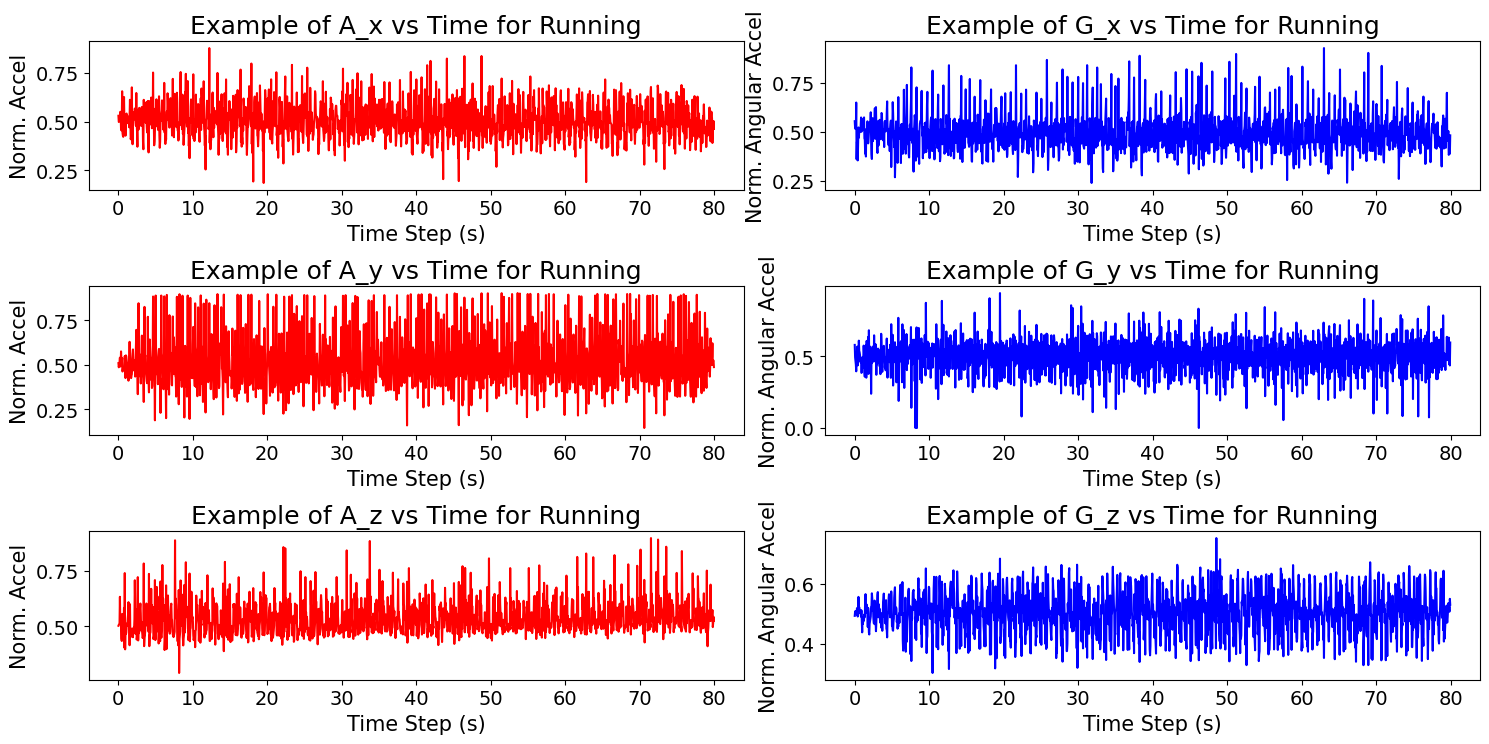

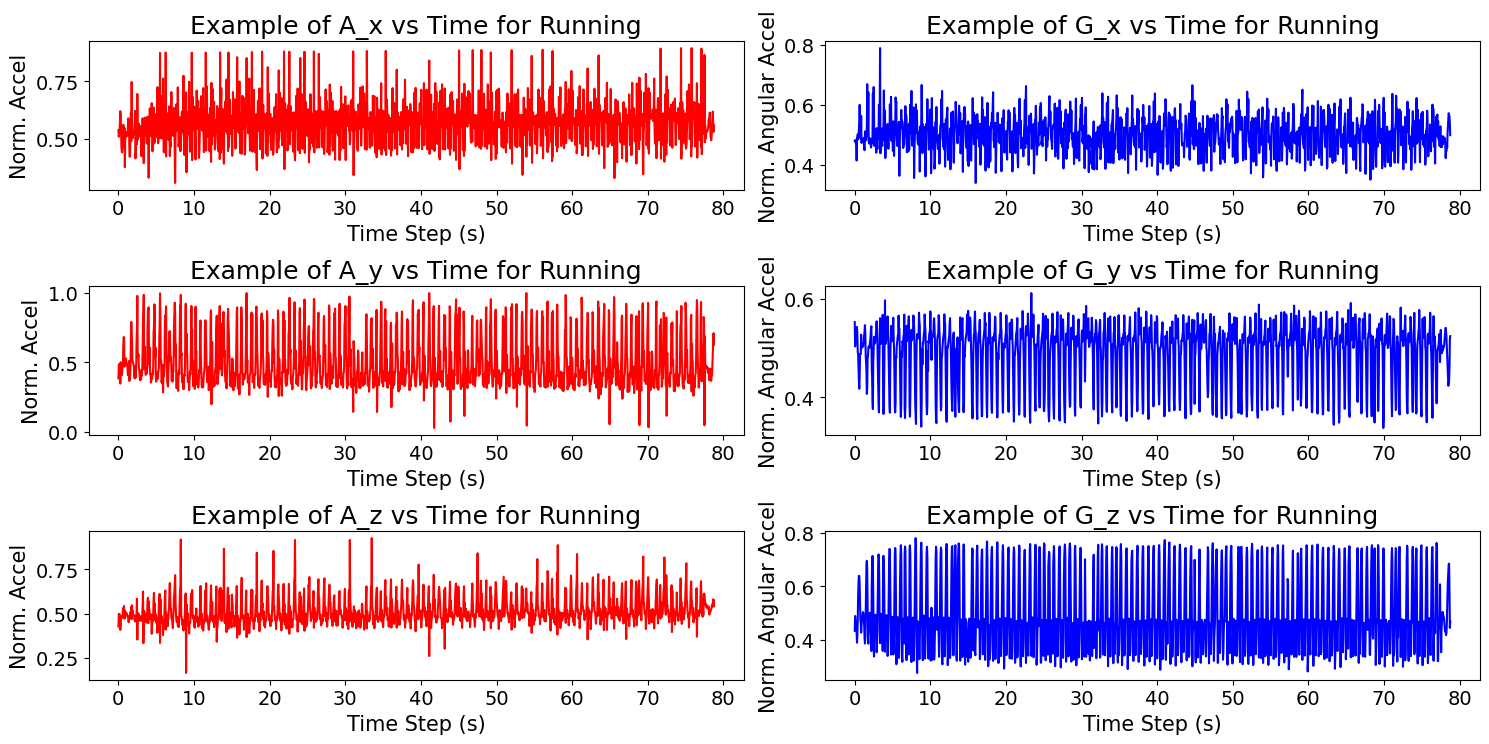

In [41]:
# set variables
participant_id = 8
day = 4
accel_values = ['A_x', 'A_y', 'A_z']
gyro_values = ['G_x', 'G_y', 'G_z']
ax1 = 'Norm. Accel'
ax2 = 'Norm. Angular Accel'
title_size = 18
ax_size = 15
label_size = 14



### ArmCurl Workout and Wrist IMU ###

# filter data for line graph
workout_type = 'ArmCurl'
sensor_position = 'wrist'
filtered_data = data[(data['Object'] == participant_id) &
                     (data['Day'] == day) &
                     (data['Workout'] == workout_type) &
                     (data['Sensor_Position'] == sensor_position)]

# add column with timestep (20Hz / 0.05s)
filtered_data['timestep'] = range(0, 0 + len(filtered_data))
filtered_data['timestep'] = filtered_data['timestep'] * 0.05

# create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7.5))

# plot line graphs of filtered data (accel_values)
for i, value in enumerate(accel_values):
    row = i  
    col = 0  
    ax = axes[row, col]
    filtered_data.plot.line(x='timestep', y=value, color='r', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax1, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# plot line graphs of filtered data (gyro_values)
for i, value in enumerate(gyro_values):
    row = i  
    col = 1 
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='b', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax2, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# adjust the layout and spacing  
plt.tight_layout() 

# save the figure
plt.savefig(f"{workout_type}_{sensor_position}_plot.png")

# show the plot
plt.show()



### ArmCurl Workout and Pocket IMU ###

# filter data for line graph
sensor_position = 'pocket'
filtered_data = data[(data['Object'] == participant_id) &
                     (data['Day'] == day) &
                     (data['Workout'] == workout_type) &
                     (data['Sensor_Position'] == sensor_position)]

# add column with timestep (20Hz / 0.05s)
filtered_data['timestep'] = range(0, 0 + len(filtered_data))
filtered_data['timestep'] = filtered_data['timestep'] * 0.05

# create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7.5))

# plot line graphs of filtered data (accel_values)
for i, value in enumerate(accel_values):
    row = i 
    col = 0  
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='r', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax1, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# plot line graphs of filtered data (gyro_values)
for i, value in enumerate(gyro_values):
    row = i  
    col = 1  
    ax = axes[row, col]
    filtered_data.plot.line(x='timestep', y=value, color='b', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax2, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# adjust the layout and spacing  
plt.tight_layout()  

# save the figure
plt.savefig(f"{workout_type}_{sensor_position}_plot.png")

# show the plot
plt.show()



### ArmCurl Workout and Leg IMU ###

# filter data for line graph
sensor_position = 'leg'

filtered_data = data[(data['Object'] == participant_id) &
                     (data['Day'] == day) &
                     (data['Workout'] == workout_type) &
                     (data['Sensor_Position'] == sensor_position)]

# add column with timestep (20Hz / 0.05s)
filtered_data['timestep'] = range(0, 0 + len(filtered_data))
filtered_data['timestep'] = filtered_data['timestep'] * 0.05

# create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7.5))

# plot line graphs of filtered data (accel_values)
for i, value in enumerate(accel_values):
    row = i 
    col = 0 
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='r', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax1, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# plot line graphs of filtered data (gyro_values)
for i, value in enumerate(gyro_values):
    row = i  
    col = 1 
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='b', ax=ax,
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}',
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax2, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# adjust the layout and spacing  
plt.tight_layout()

# save the figure
plt.savefig(f"{workout_type}_{sensor_position}_plot.png")

# show the plot
plt.show()



### Running Workout and Wrist IMU ###

workout_type = 'Running'
sensor_position = 'wrist'

filtered_data = data[(data['Object'] == participant_id) &
                     (data['Day'] == day) &
                     (data['Workout'] == workout_type) &
                     (data['Sensor_Position'] == sensor_position)]

# add column with timestep (20Hz / 0.05s)
filtered_data['timestep'] = range(0, 0 + len(filtered_data))
filtered_data['timestep'] = filtered_data['timestep'] * 0.05

# create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7.5))

# plot line graphs of filtered data (accel_values)
for i, value in enumerate(accel_values):
    row = i  
    col = 0  
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='r', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax1, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# plot line graphs of filtered data (gyro_values)
for i, value in enumerate(gyro_values):
    row = i 
    col = 1 
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='b', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax2, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# adjust the layout and spacing  
plt.tight_layout() 

# save the figure
plt.savefig(f"{workout_type}_{sensor_position}_plot.png")

# show the plot
plt.show()



### Running Workout and Pocket IMU ###

# filter data for line graph
sensor_position = 'pocket'

filtered_data = data[(data['Object'] == participant_id) &
                     (data['Day'] == day) &
                     (data['Workout'] == workout_type) &
                     (data['Sensor_Position'] == sensor_position)]

# add column with timestep (20Hz / 0.05s)
filtered_data['timestep'] = range(0, 0 + len(filtered_data))
filtered_data['timestep'] = filtered_data['timestep'] * 0.05

# create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7.5))

# plot line graphs of filtered data (accel_values)
for i, value in enumerate(accel_values):
    row = i  
    col = 0  
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='r', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax1, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# plot line graphs of filtered data (gyro_values)
for i, value in enumerate(gyro_values):
    row = i  
    col = 1  
    ax = axes[row, col]  
    filtered_data.plot.line(x='timestep', y=value, color='b', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax2, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# adjust the layout and spacing  
plt.tight_layout() 

# save the figure
plt.savefig(f"{workout_type}_{sensor_position}_plot.png")

# show the plot
plt.show()



### Running Workout and Leg IMU ###

# filter data for line graph
sensor_position = 'leg'

filtered_data = data[(data['Object'] == participant_id) &
                     (data['Day'] == day) &
                     (data['Workout'] == workout_type) &
                     (data['Sensor_Position'] == sensor_position)]

# add column with timestep (20Hz / 0.05s)
filtered_data['timestep'] = range(0, 0 + len(filtered_data))
filtered_data['timestep'] = filtered_data['timestep'] * 0.05

# create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7.5))

# plot line graphs of filtered data (accel_values)
for i, value in enumerate(accel_values):
    row = i  
    col = 0 
    ax = axes[row, col] 
    filtered_data.plot.line(x='timestep', y=value, color='r', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax1, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# plot line graphs of filtered data (gyro_values)
for i, value in enumerate(gyro_values):
    row = i  
    col = 1 
    ax = axes[row, col]  
    filtered_data.plot.line(x='timestep', y=value, color='b', ax=ax, 
                            legend=False)
    ax.set_title(f'Example of {value} vs Time for {workout_type}', 
                 fontsize=title_size)
    ax.set_xlabel('Time Step (s)', fontsize=ax_size)
    ax.set_ylabel(ax2, fontsize=ax_size)
    ax.tick_params(axis='both', labelsize=label_size)

# adjust the layout and spacing  
plt.tight_layout()

# save the figure
plt.savefig(f"{workout_type}_{sensor_position}_plot.png")

# show the plot
plt.show()